# The RNN

## simple RNN in keras

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Preparing data

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train0, y_train), (input_test0, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train0), 'train sequences')
print(len(input_test0), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train0, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test0, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.6424 - acc: 0.6113 - val_loss: 0.4665 - val_acc: 0.8050
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4071 - acc: 0.8270 - val_loss: 0.3774 - val_acc: 0.8416
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3006 - acc: 0.8788 - val_loss: 0.4738 - val_acc: 0.7882
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2392 - acc: 0.9089 - val_loss: 0.3525 - val_acc: 0.8558
Epoch 5/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1742 - acc: 0.9344 - val_loss: 0.4265 - val_acc: 0.8366
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1175 - acc: 0.9596 - val_loss: 0.4359 - val_acc: 0.8368
Epoch 7/10
20000/20000 [==========

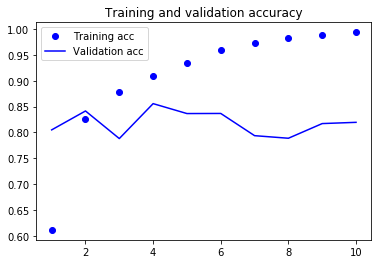

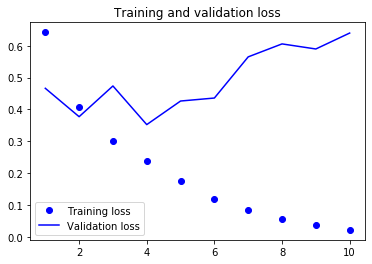

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## My testing

### save model and reuse it, and try to predict a dataset

In [48]:
hist2 = model.predict([input_test[1]])
#print(input_test0[1])
#print(hist2)

wordIdx = imdb.get_word_index()
#wordIdx['a'] = 3
idxWord = {v:k for k,v in wordIdx.items()}
#idxWord.get(3) = 'a'
decoded = " ".join( [idxWord.get(i - 3, "#") for i in input_test0[0]] )

print(decoded)
print(y_train[0])


# please give this one a miss br br # # and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite # so all you madison fans give this a miss
1


### Try to save and predict my data

In [63]:
from keras import models
model.save('simplernn.h5')
model2 = models.load_model('simplernn.h5')
# model2.summary()

data = 'I hate love this movie'
dataArr = data.lower().split()
print(dataArr)
indexData = [wordIdx[i] for i in dataArr]
print(indexData)
model2.predict([indexData])

['i', 'hate', 'love', 'this', 'movie']
[10, 781, 116, 11, 17]


array([[0.46103293],
       [0.11307251],
       [0.4650474 ],
       [0.43269092],
       [0.6199068 ]], dtype=float32)

## LSTM and GRU

### Long short-term memory(LSTM)

the algo simply present: **y = activation(dot(state_t, U) + dot(input_t, W) + b)**